In [1]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
#讀取檔案
def read_file(file_name):
    data = pd.read_csv(file_name)
    print("Input Data and Shape")
    print(data.shape)

    f1 = data['V1'].values
    f2 = data['V2'].values
    X = np.array(list(zip(f1, f2)))
    plt.scatter(f1, f2, c='black', s=7)
    
    return X

In [3]:
#計算距離
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [4]:
def k_means(k,X):
    C_x = np.random.randint(0, np.max(X)-20, size=k)
    C_y = np.random.randint(0, np.max(X)-20, size=k)
    C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
    print("初始亂數位置:")
    print(C)

    C_old = np.zeros(C.shape)
    clusters = np.zeros(len(X))
    error = dist(C, C_old, None)

    while error != 0:
        for i in range(len(X)):
            distances = dist(X[i], C)
            cluster = np.argmin(distances)
            clusters[i] = cluster
        C_old = deepcopy(C)
        for i in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j] == i]
            C[i] = np.mean(points, axis=0)
        error = dist(C, C_old, None)
    print("\n中心位置:")
    print(C)
    return clusters

In [5]:
def draw(clusters ,X):
    #顏色(k)最多6種
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    fig, ax = plt.subplots()
    for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])

Input Data and Shape
(3000, 2)
初始亂數位置:
[[39. 74.]
 [55.  1.]
 [20. 41.]]

中心位置:
[[ 40.683628  59.715893]
 [ 69.92419  -10.119641]
 [  9.478045  10.686052]]


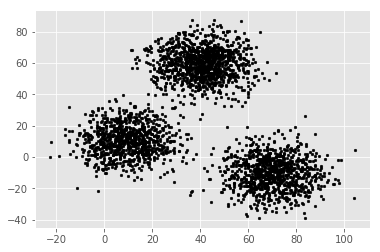

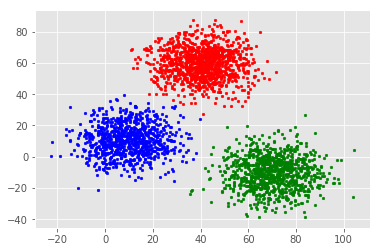

In [6]:
k = 3
x = read_file('xclara.csv')
clusters = k_means(k, x)
draw(clusters, x)